# Lec 2. Linear Regression, Logistic Regression

## Notation:

### 1) d: dimension of $x_i$, number of features;

### 2) n: number of $x_i$, number of samples;

## Linear Regression

### Problem:

- What we have: 

$x_{i}\in R^{d}$, 

$y_{i}\in R$, 

$h(x)=w^{T}x_{i},\space w\in R^{d}$, 

### $\rightarrow$ $\min_{w\in R^{d}}\sum_{i=1}^{n}(\underbrace{w^{T}x_{i}}_{inner\space product}-y_{i})^{2}\frac{1}{n}$

### we want to solve $w$ to $\underline{minimize}$ the ERM. $\rightarrow$ __take derivative__ 

### Solve

$\Rightarrow\sum\limits_{i=1}^{n}\sum\limits_{j=1}^{d}(w[j]x_{i}-y_{i})^{2}=J(W)$

$\frac{\partial J(w)}{\partial w_{j}}=\sum\limits_{i=1}^{n}\{2\sum\limits_{j=1}^{d}(w[j]x_{i}[j]-y_{i})x_{i}[j]\}\xrightarrow[let]{}0;$

$w\in R^{\space 1\space\times\space d}$

$x_{i}\in\space R^{d},\space y_{i}\in R\space\rightarrow Y:\space R^{1\times n}$

$where,\space x_{i}\rightarrow X:\space R^{d\times n}$

$where,\space [x_{1}^{d\times 1},x_{2}^{d\times 1},...,x_{n}^{d\times 1}]$

\begin{equation}
  label \left \{
  \begin{aligned}
    &X\in R^{\space d\times n}\space\space[x_{1},x_{2},x_{3},...,x_{n}]_{d}\\
    &y\in R^{1\times n}\space\space [y_{1},y_{2},y_{3},...,y_{n}]
  \end{aligned} \right.
\end{equation} 

$\min_{w}\|w^{T}_{1\times d}X_{d\times n}-y_{1 \times n}\|^{2}_{2}$

$=\frac{\partial}{\partial w}[(w^{T}X-y)^{T}_{n\times 1}(w^{T}X-y)_{n\times 1}] _ {n\times n}$

$=2(w^{T}X-y)X^{T}_{n\times d}$

$\Rightarrow w^{T}_{d\times 1}X_{d\times n}X^{T}_{n\times d}=yX^{T}_{n\times d}$

Norm of $v \in R^{n},\space col\space vector$, $\|v\|_{2}=\sqrt{\sum\limits_{i=1}^{n}V_{i}^{2}}=\sqrt{V^{T}V}$

- 1) n < d, $rank(XX^{T}) < D$
- 2) n = d, $w = (XX^{T})^{-1}Xy^{T}$

- __For Case 1__:

Number of samples is smaller than the number of feature (dimension) of samples.

When matrix $XX^T$ is not full rank $\rightarrow$ __Regularization__, __L1__ or __L2__


- __L2__: 

    - $w^*=arg\space \min\limits_w [(y-xw)^T(y-xw)+\lambda||w||^2_2]$

- where $\lambda>0$, used to adjust ration between Regularization and variance of error;

- $||...||_2$ is norm $L_2$

#### $siz(XX^{T})=d\times d, d=1, w=R^{1}$
#### $rank(XX^{T})=1,X\in R^{1},y\in R^{1}$

$(XX^{T}+\lambda I)^{-1}Xy^{T}=w$

- $\lambda : Singular\space Value$
- $A\in R^{\space m\times n}$
- $A=U\Sigma V^{T}$

- For Case 2:

$w = (XX^{T})^{-1}Xy^{T}$

## Ridge Regression

$\frac{1}{n}\|w^{T}X-y\|^{2}_{2}+\underset{\lambda \|w\|^{2}_{1}}{\lambda \|w\|^{2}_{2}},\space \lambda >\space 0$

$J(w)=\frac{1}{m}\|w^{T}X-y\|^2_2$

- Move $w_0$ to get smaller J(w) by $\Delta$  along the negative direction of the gradient, now $w_{0}\rightarrow w_{1}$

- for $w_{1}$ do the same thing,
- ...

### Algorithm:

Get  $\nabla J(w)$

$1^o$. Satart with arbitrary $w_{0}$

$\frac{\partial J(w)}{\partial w}=2(w^{T}_{1\times n}X_{n\times d}-Y)X^{T}_{1\times d},\space\space for\space t=1...T$

$2^o$. 

$w^{(1)}=w^{0}-\underset{learning\space rate}{\Delta}\nabla J(w^{0})$

.

.

.

$w^{(t)}=w^{t-1}-\Delta\nabla J(w^{t-1})$

$\Rightarrow$ Output: $w^{*}=w^{T}$

time consuming: $\nabla J(w)=2(w^{T}X-Y)X^{T},\space\space\space\space\space\space O(dn^{2})$

$\hookrightarrow$ it will be improved as long as the direction we choose makes the subjective smaller 

__Note__: Original Algorithm -> $J(w)=\sum\limits_{i}^{n}(w^{T}X_{i}-Y_{i})^2$


$\frac{\partial J(w)}{\partial w}=\sum\limits_{i=1}^{n}\frac{\partial}{\partial w}(w^{T}X_{i}Y_{i})^2$

$=\frac{\partial}{\partial w}(w^{T}X_{1}-Y_{1})^2+\frac{\partial}{\partial w}(w^{T}X_{2}-Y_{2})^2+...$

$\rightarrow$ Instead of taking the derivative of all samples, we choose $S_{i}(X_{i},Y_{i})$ for n samples as $S_t$

$\nabla J(w)\bigg|_{w^{t-1}}=\frac{\partial}{\partial w}(w^{T}\underset{RV}{X_{t}}-Y_{t})^2\space\leftarrow not\space robostic$

$\Rightarrow w^{t}=w^{t-1}-\Delta\nabla J(w)\bigg|_{w=w^{t-1}}$

Since $X_t$ is Rv, we want to find $E\{\Delta J(w^t)\}$

$E\{\nabla J(w^{t})\}=\frac{1}{n}\frac{\partial}{\partial w}(w^{T}X_{1}-Y_{1})^2+\frac{1}{n}\frac{\partial}{\partial w}(w^{T}X_{2}-Y_{2})^2+...$

$=\frac{1}{n}\sum\limits_{i=1}^{n}(w^{T}X_{i}-Y_{I})X_{i}^{T}\xrightarrow[E\{\nabla J(w^{t})\}=\nabla J(w^{t})]{Unbiased\space Estimator}\nabla J(w)=\frac{\partial}{\partial w}(X_{t}-Y_{t})^2$

- Unbiased Estimator:

$E\{ \hat{r\space}\}=r$

__Note__:

When d $\rightarrow$ huge, $J(w)=\|w^{T}X-Y\|_{2}^{2}+\lambda\|w\|_{1}$, where $\|w\|_{1}=\sum\limits_{i=1}^{d}|w_{1}|$

### Understand It in Bayes Way:

$y_{i}=\underset{\downarrow \space fixed}{w^{T}}\underset{\uparrow \space fixed}{X_{i}}+\epsilon_{i},\space \epsilon_{i}\sim N(0,\sigma^2)$

$P(y_{i}|x_{i},w)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{1}{2\delta^{2}}(y_{i}-w_{i}^{T}X_{i})}$

$\Rightarrow \underset{a\space function\space of\space \epsilon}{P(Y|\underset{\triangle}{w},\underset{\triangle}{X})}=\prod\limits_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(y_{i}-w_{i}X_{i})^2}$

$=(\frac{1}{\sqrt{2\pi\underset{\space\space\space\space\space\large \uparrow given}{{\sigma^{2}}}}})exp[\underbrace{-\frac{\sum\limits_{i=1}^{n}(y_{i}-w_{i}^{T}X_{i})^{2}}{2\sigma^2}}_{\large maximize\space it}]$

$\rightarrow$ MLE: Maximum Likelihood Estimator

$\hookrightarrow$ choose $w_{i}$ to make the data as high probability as possible

$arg\max\limits_{h}P(Y|h)$

$\Rightarrow arg\max\limits_{w}P(Y|w,X)\Leftrightarrow \min\limits_{w}\underline{\sum_{i=1}^{n}(y_{i}-w_{i}^{T}X_{i})^{2}}$

$\rightarrow$ Maximize  A Posterior Estimator 

$arg \max P(\underset{\downarrow\space what's\space the\space distribution\space of\space h\space?}{h}|\underset{\space\space\space\space\space\space\space\space\space\uparrow\space(X,Y)}{S})$

$P(w|\underset{observation}{Y}) =\frac{P(w,Y)}{P(Y)}=\frac{P(\underset{prior}{w})P(Y|w)}{P(Y)}$

$\Rightarrow arg\max\limits_{w}P(w|Y)\xrightarrow{give\space P(Y)}{\underset{=\space\frac{1}{P(Y)}}{\alpha} P(w)P(Y|w)}$

$Build\space w_{i} \sim N(0,\sigma_{w_{i}}^2)\space for\space all\space i\in1,...,d$ 

$P(Y|w)P(w)=(\frac{1}{\sqrt{2\pi \sigma^2}})^{n}exp[\underline{-\frac{\sum\limits_{i=1}^{n}(y_i-w_{i}^{T}X_{i})^2}{2\sigma^2}}](\frac{1}{2\pi\sigma_{w}^2})^{d}exp[\underline{-\frac{\sum\limits_{i=1}^{d}w_{i}^{2}}{2\sigma_{w}^2}}]$

$\underset{maximize}{\Rightarrow}
+\frac{\sum\limits_{i=1}^{d}w_{i}^{2}}{2\sigma_{w}^{2}}+\frac{\sum\limits_{i=1}^{n}(y_{i}-w_{i}^{T}X_{i}^{2})}{2\sigma^{2}}$

$\Rightarrow arg\max\limits_{w}\space \|y-w^{T}X\|_{2}^{2}+\frac{\sigma^{2}}{\sigma_{w}^{2}}\|w\|_{2}^{2}$

## Linear Regression Code

$w\in arg\min\|y-w^{T}X\|_{2}^{2}$

$\Rightarrow 2(y-w^{T}X)X^{T}=0$

$\Rightarrow w^{T}XX^{T}=yX^{T}$

$\Rightarrow XX^{T}w=Xy^{T}$

$w=(XX^{T})^{-1}Xy^{T}$

### Method 1: Linear Regression -> Calculate Directly

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
from numpy.linalg import norm
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Step 1. Generate Random Samples

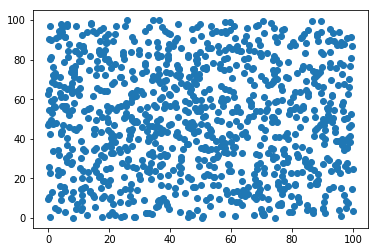

In [13]:
d, N = 2, 1000
X = np.random.rand(d,N)*100
plt.scatter(X[0,:],X[1,:])

### Step 2. Generate Observations

### Now, set $w^T$ and noise $\epsilon$ (both are guassin distirbution): $y = w^{T}X+\epsilon$

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


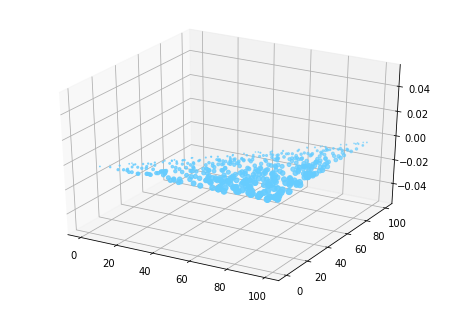

In [14]:
mu,sigma = 0,1
w = np.random.normal(mu,sigma,2)
eps = np.random.normal(mu,sigma)*5
wT = w.transpose()
y = np.dot(wT,X) + eps
y0 = np.dot(wT,X)
fig1 = plt.figure()
ax = Axes3D(fig1)
plt.scatter(X[0,:],X[1,:],y, color = '#66ccff')

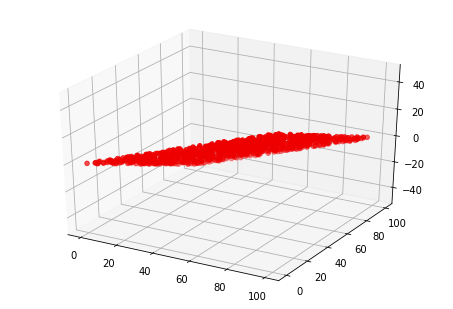

In [15]:
fig2 = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig2)
ax.scatter(X[0,:],X[1,:],y0,color ='#EE0000')
plt.show()

### Step3. Calculate w

### In Linear Regression, we want to solve w

In [16]:
XT = X.transpose()
yT = y.transpose()
w1h = np.dot(np.dot(inv(np.dot(X,XT)),X),yT)

In [17]:
norm(w - w1h)

0.037729399016601051

In [18]:
y_pre = np.dot(w1h,X)

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


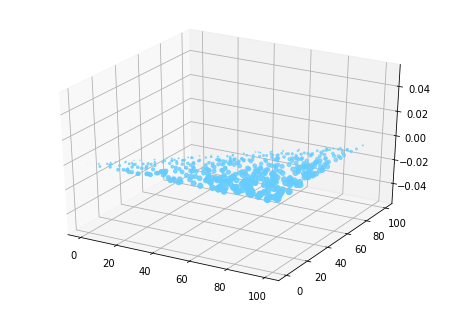

In [19]:
fig3 = plt.figure()
ax = Axes3D(fig3)
plt.scatter(X[0,:],X[1,:],y_pre, color = '#66ccff')

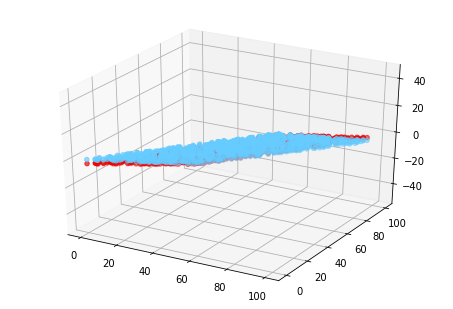

In [21]:
fig4 = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig4)
ax.scatter(X[0,:],X[1,:],y,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre, color = '#66ccff')
plt.show()

In [25]:
norm(np.dot(w1h,X).reshape(N,1)-y.reshape(N,1))

35.977361309668424

### Method 2: Stochastic Gradient Descent

### Step 3. Calculate w

### $w^+\space =\space w\space -\space \Delta (w^TX\space-\space y)X^T $

In [27]:
w2h = np.random.normal(mu,sigma,2)
# sgd = 0

In [28]:
T = 100000
delta = 0.00001

for i in range(T):
    
    # gd = delta*np.dot((np.dot(w2h,X)-y),XT)
    # sgd += gd
    obj_before = norm(np.dot(w2h,X).reshape(N,1)-y.reshape(N,1))
    w2h = w2h - delta * np.dot((np.dot(w2h,X)-y),XT)
    obj_after = norm(np.dot(w2h,X).reshape(N,1)-y.reshape(N,1))
    if (obj_after > obj_before):
        delta = delta/2

In [29]:
y_pre_new = np.dot(w2h,X)

In [30]:
norm(np.dot(w2h,X).reshape(N,1)-y0.reshape(N,1))

89.144686722236301

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


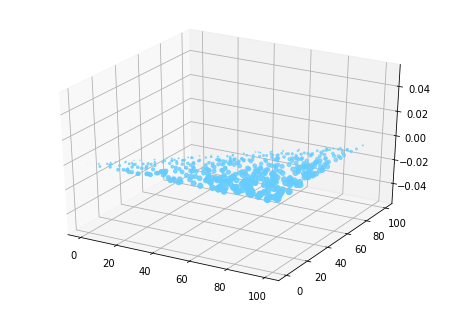

In [31]:
fig5 = plt.figure()
ax = Axes3D(fig5)
plt.scatter(X[0,:],X[1,:],y_pre_new, color = '#66ccff')

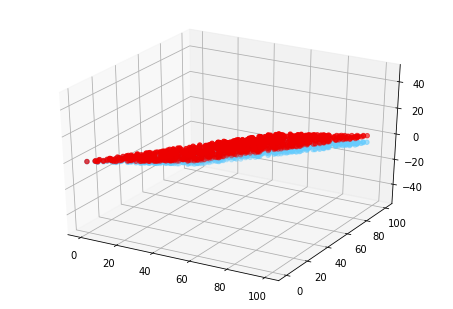

In [32]:
fig6 = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig6)
ax.scatter(X[0,:],X[1,:],y0,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_new, color = '#66ccff')
plt.show()

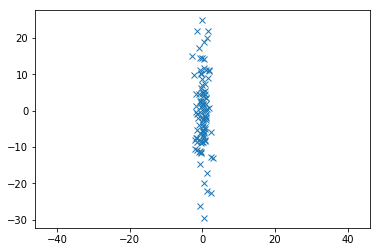

In [33]:
mu, sigma = 0, 0.1 # mean and standard deviative
s = np.random.normal(mu, sigma, 10000)

mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

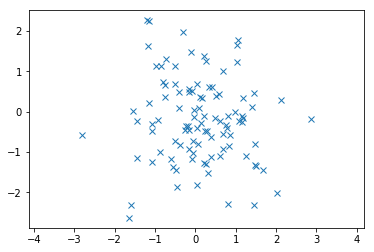

In [35]:
import numpy as np
import matplotlib.pyplot as plt
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

### Method 2: Gradient

# Example - Student

In [2]:
import pandas as pd
data = pd.read_csv('student.csv')

In [3]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

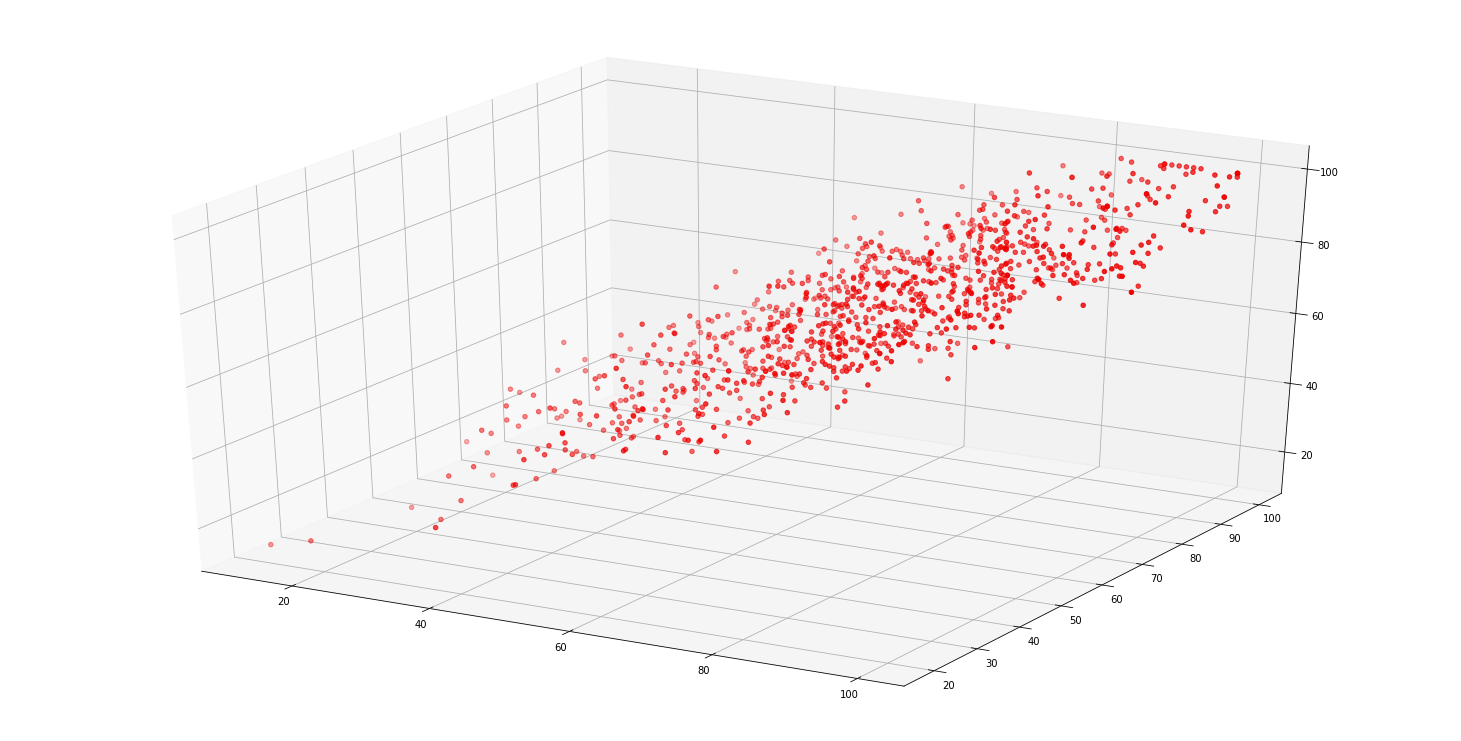

In [4]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color = '#ee0000')

## Method 1

In [7]:
X = [math.transpose(),read.transpose()]
X = np.asarray(X)
XT = X.transpose()
y = write.transpose()
yT = y.transpose()

In [8]:
w3h = np.dot(np.dot(inv(np.dot(X,XT)),X),yT)

In [9]:
y_pre_write = np.dot(w3h,X)

In [10]:
norm(y_pre_write - y)

144.90483756198427

In [11]:
m = len(math)
m

1000

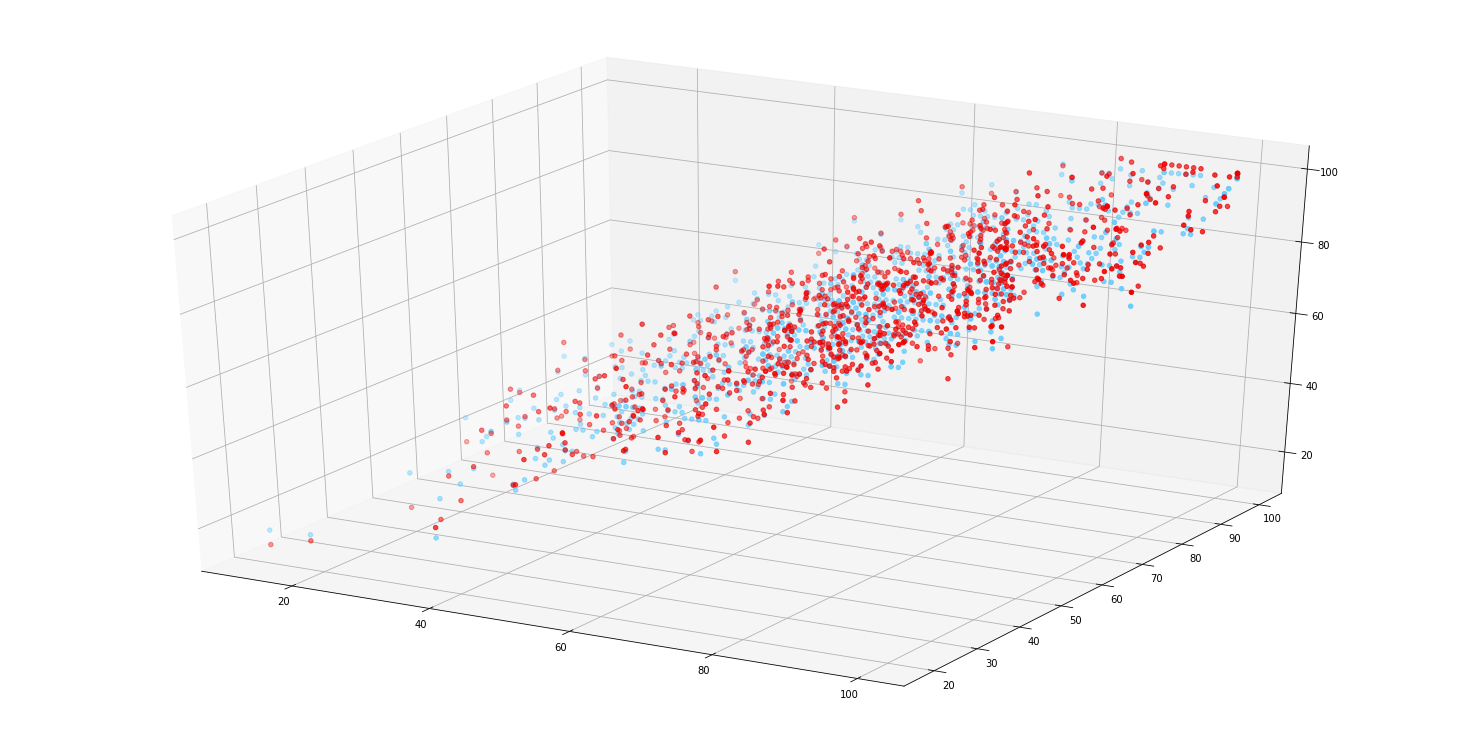

In [12]:
fig = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig)
ax.scatter(X[0,:],X[1,:],y,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_write, color = '#66ccff')
plt.show()

## Method 2

In [45]:
mu, sigma = 0, 0.1 # mean and standard deviative
s = np.random.normal(mu, sigma, 10000)
w4h = (np.random.normal(mu,sigma,2))

In [46]:
T = 100000
delta = 0.00001

for i in range(T):
    
    # gd = delta*np.dot((np.dot(w2h,X)-y),XT)
    # sgd += gd
    obj_before = norm(np.dot(w4h.T,X).reshape(m,1)-y.reshape(m,1))
    w4h = w4h - delta * np.dot((np.dot(w4h,X)-y),XT)
    obj_after = norm(np.dot(w4h.T,X).reshape(m,1)-y.reshape(m,1))
    if (obj_after > obj_before):
        delta = delta/2

In [47]:
y_pre_write2 = np.dot(XT,w4h)

In [48]:
norm(y_pre_write2-y)

144.90483756198472

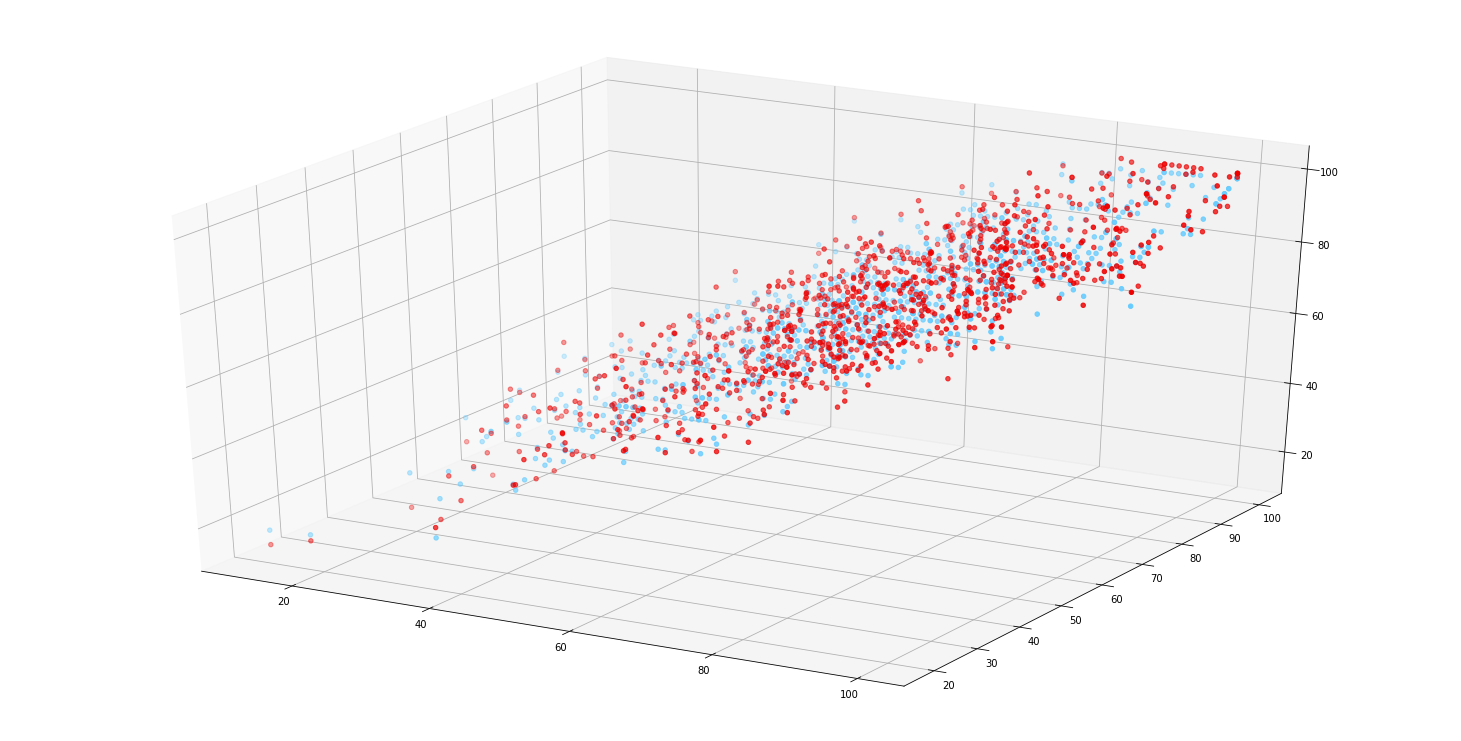

In [49]:
fig = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig)
ax.scatter(X[0,:],X[1,:],y,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_write2, color = '#66ccff')
plt.show()

## Gradient

### $w^+\space =\space w\space -\space \Delta (w^TX\space-\space y)X^T $

### 1) Cost Function: $\frac{1}{N}\sum(w^TX - y)^2$

In [50]:
mu, sigma = 0, 0.1 # mean and standard deviative
s = np.random.normal(mu, sigma, 10000)
w5h = np.random.normal(mu,sigma,2)

In [51]:
def cost_function(X, Y, B):
    N = len(Y)
    J = np.sum(((B.T).dot(X)-Y)**2)/(2*N)
    return J

In [52]:
inital_cost = cost_function(X,y,w5h)
inital_cost

1273.7030767313402

### 2) Gradient Descent

### $w^+\space =\space w\space -\space \Delta (w^TX\space-\space y)X^T $

In [57]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_rec = [0] * iterations
    N = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis
        h = (B.T).dot(X)
        # loss
        loss = h - Y
        # Gradient
        gradient = loss.dot(X.T)/N
        # Updating B
        loss_before = norm(loss)
        B = B - alpha * gradient
        loss_after = norm((B.T).dot(X)-Y)
        if loss_after > loss_before:
            alpha = alpha/2
        # New cost
        cost_new = cost_function(X,Y,B)
        cost_rec[iteration] = cost_new
    
    return B,cost_rec
        

In [58]:
w5h, cost_records = gradient_descent(X,y,w5h, 0.0001,100000)

In [67]:
cost_records[1]

18.790193251528979

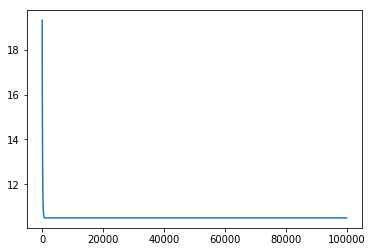

In [60]:
plt.figure(figsize = (6,4))
plt.plot(range(0,100000),cost_records)

In [61]:
y_pre_write3 = (w5h.T).dot(X)

In [68]:
norm(y_pre_write3-y)

144.90483756198537

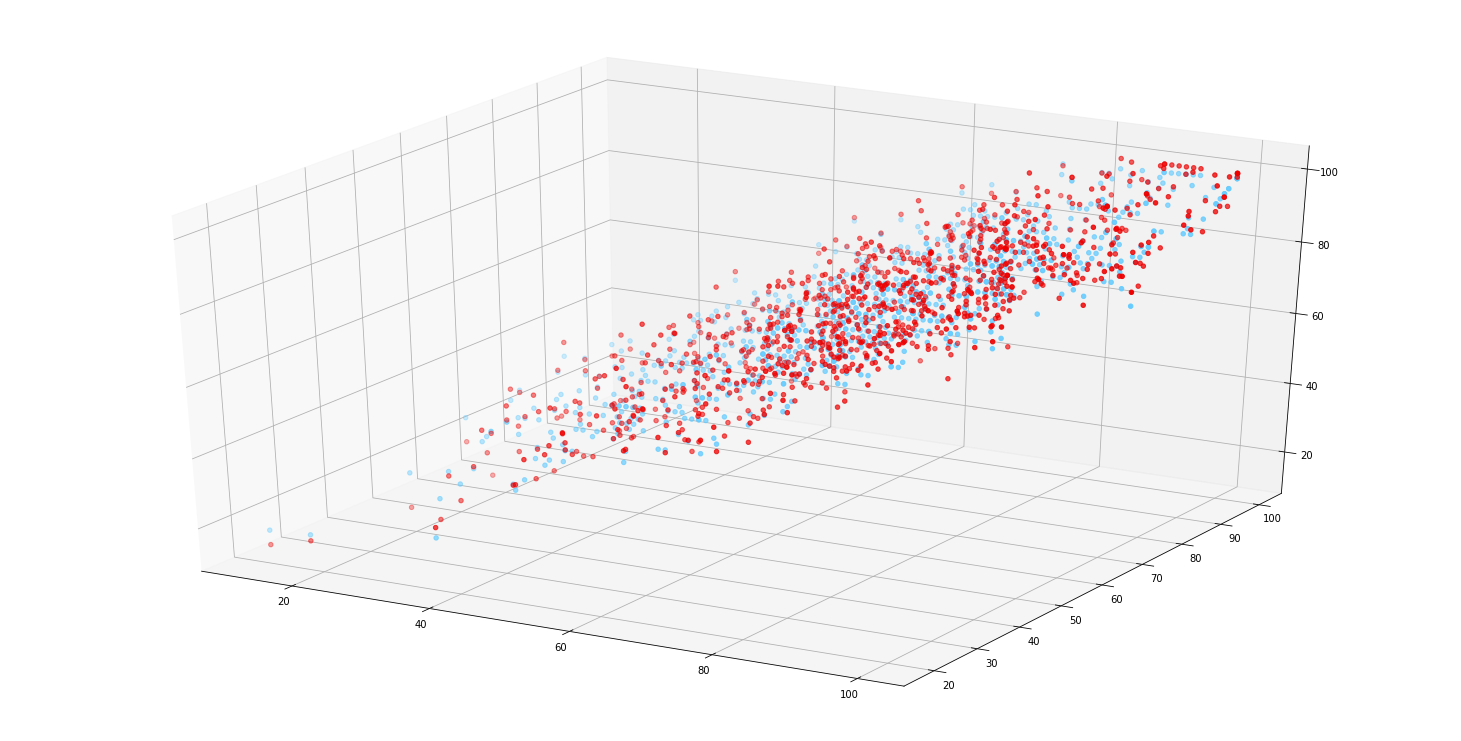

In [62]:
fig = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig)
ax.scatter(X[0,:],X[1,:],y,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_write3, color = '#66ccff')
plt.show()

### With intersect

In [76]:
x0 = np.ones(len(math))
X0 = np.asarray([x0.T,math.transpose(),read.transpose()])

In [77]:
mu, sigma = 0, 0.1 # mean and standard deviative
w6h = (np.random.normal(mu,sigma,3))

In [78]:
w6h, cost_records0 = gradient_descent(X0,y,w6h, 0.0001,100000)

In [83]:
y_pre_write4 = (w6h.T).dot(X0)

In [84]:
norm(y_pre_write4-y)

144.76255682596502

In [81]:
cost_records0[-1]

10.478098929395378

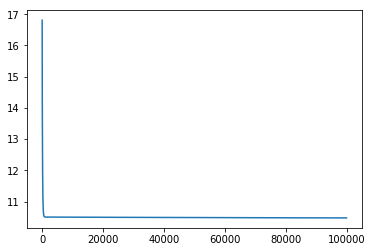

In [82]:
plt.figure(figsize = (6,4))
plt.plot(range(0,100000),cost_records0)

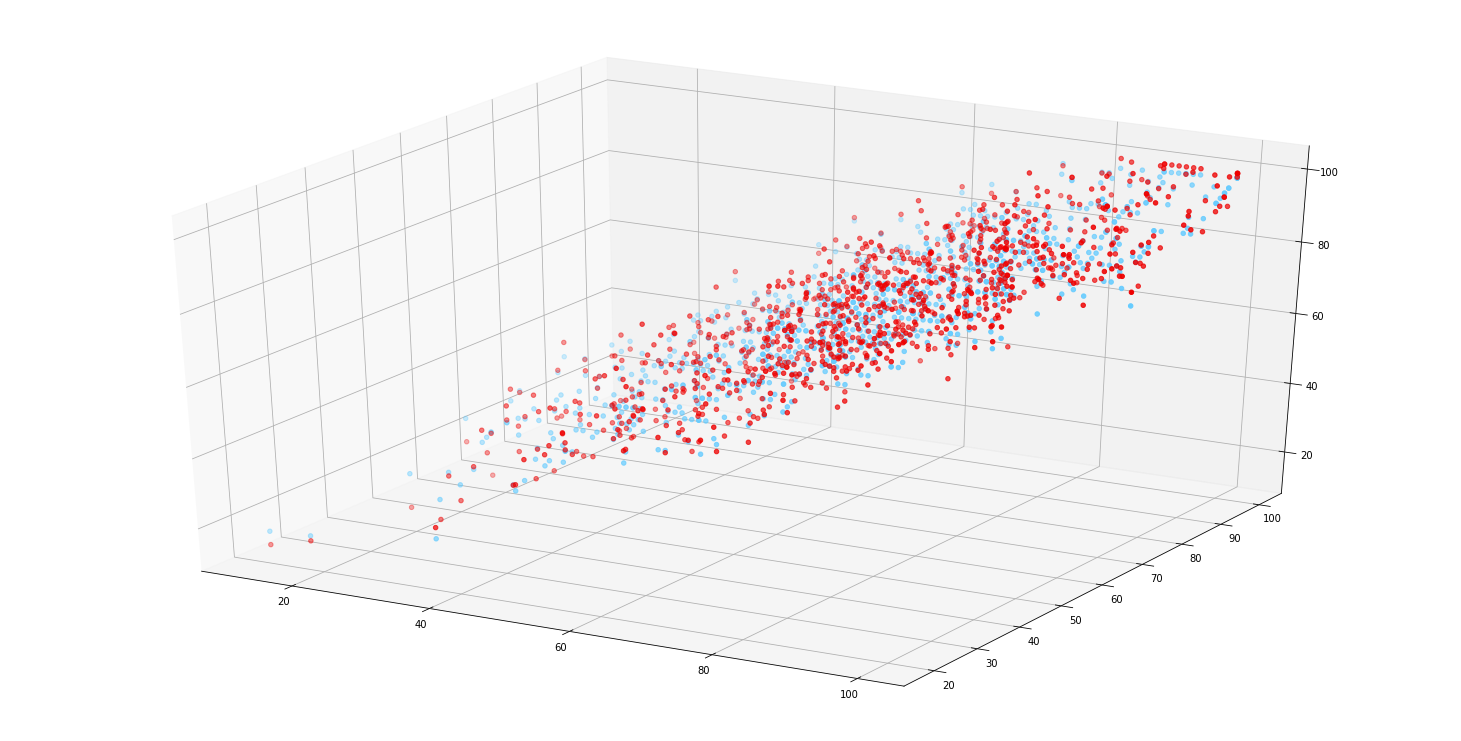

In [85]:
fig = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig)
ax.scatter(X[0,:],X[1,:],y,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_write4, color = '#66ccff')
plt.show()

## Minimum Likelihood Estimation

$logP(w|Y)=logP(w)+logP(Y|w)$

$\rightarrow arg\max_{w\in R^{d}}P\{Y|w,X\},\space function\space of\space w$

$\rightarrow f(Y,X,w),\space give\space w^{1\times d},X^{1\times d},Y$

## Maximun A Posterior Estimation

$P(w|Y)=\frac{P(w,Y)}{P(Y)}=\frac{P(w)P(Y|w)}{P(Y)}$

$assume\space\space w\sim N(0,\sigma_{w}^{2})$

$arg\min_{w\in R^{d}}\sum(y_{i}-w^{T}x_{i})^{2}+\lambda\|\underset{comes\space from\space a\space prior}{w}\|_{2}^{2}$

$y=w_{i}x_{i}+\underset{\triangle}{\epsilon},\space where\space \epsilon\sim N(0,\sigma^{2}),\space w_{i}\sim N(0,\sigma_{w}^{2})$

$P(w_{i})=\frac{1}{\sqrt{2\pi}\sigma_{w}}exp(-\frac{w_{i}^{2}}{2\sigma_{w}^{2}})$

...

$P(w)=(\frac{1}{\sqrt{2\pi}\sigma_{w}})^{d}exp(-\frac{\sum_{i=1}^{d}{w_{i}^{2}}}{2\sigma_{w}^{2}})$

$\Rightarrow P(Y|w)=\prod_{i=1}^{N}\{\frac{1}{\sqrt{2\pi}\sigma}exp[-\frac{(y-w_{i}^{T}X_{i})^2}{2\sigma^{2}}]\}$

$=(\frac{1}{\sqrt{2\pi}\sigma})^{N}exp[-\frac{\sum_{i=1}^{N}(y-w^{T}X_{i})^2}{2\sigma^{2}}]$

...

$\Rightarrow (\frac{1}{\sqrt{2\pi}\sigma_{w}^{2}})^{d}(\frac{1}{\sqrt{2\pi}\sigma})^{N}exp\{-[\frac{\sum_{i=1}^{d} w_{i}^{2}}{2\sigma_{w}^{2}}+\frac{\sum_{i=1}^{N}(y-w_{i}^{T}X_{i})^{2}}{2\sigma^{2}}]\}$

$\Rightarrow arg\min\lambda\|w\|_{2}^{2}+\|y-w^{T}X\|_{2}^{2}$

$f(w)=\|w^{T}X-y\|_{2}^{2}$

### PAC: Probability Approximation Correct (Adaptive)

$
\frac{\partial f(w)}{\partial w}=
\begin{bmatrix} \frac{\partial f}{\partial w_{1}} \\ \frac{\partial f}{\partial w_{2}}\\  \vdots \\ \frac{\partial f}{\partial w_{n}}
\end{bmatrix}$

$2(w^{T}X_{N\times 1}-y)X^{T}_{1\times N}$

## [Case Study](https://github.com/Shreyas3108/house-price-prediction)

- [Description](https://www.kaggle.com/shivachandel/kc-house-data)

### Code

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [106]:
data = pd.read_csv(r"dataset/kc_house_data.csv")

In [107]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- Check the describtion

In [63]:
max(data.shape)

21613

In [60]:
len(data)

21613

In [58]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- Check the number of bedrooms

    - 3 and 4 are most common ones

<function seaborn.utils.despine>

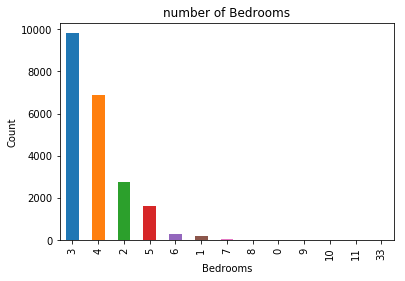

In [56]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

- Check the locality

    - common location?
    
        - latitude: -47.7 and -48.4
        
        - longitude: -122.2 to -122.4

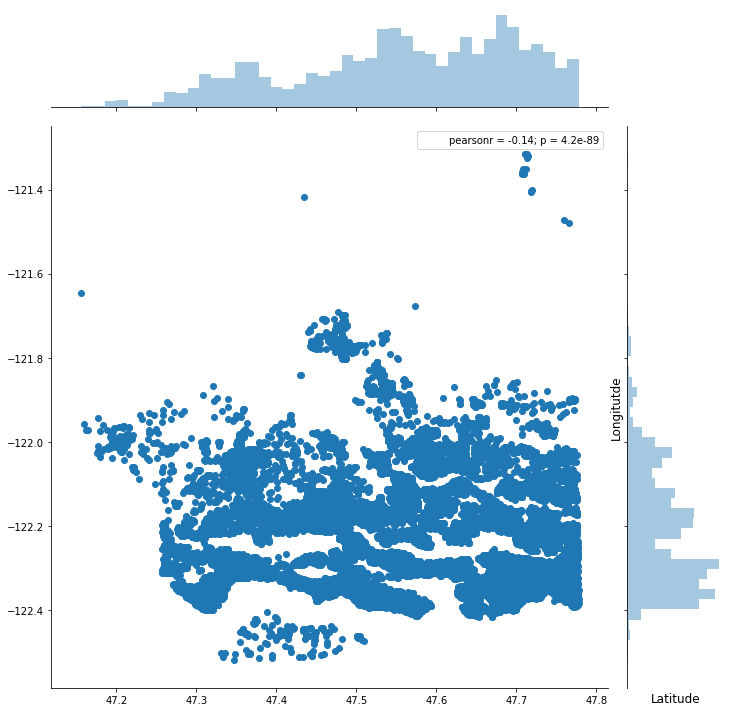

In [69]:
plt.figure(figsize=(1,1))
sns.jointplot(x=data.lat.values, y=data.long.values, size = 10)
plt.ylabel('Longitutde', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine()

-  How common factors are affecting the price of the house ?

    - price vs. square feet (close to linear)
    
    - price vs. location of the area
    
    - price vs. latitude
    
    - bedroom and bathroom

Text(0.5,1,'Price vs Square Feet')

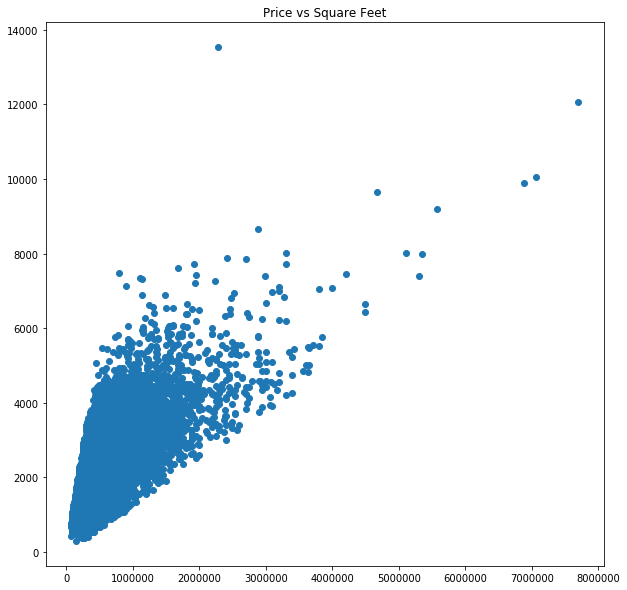

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5,1,'Price vs Location of the area')

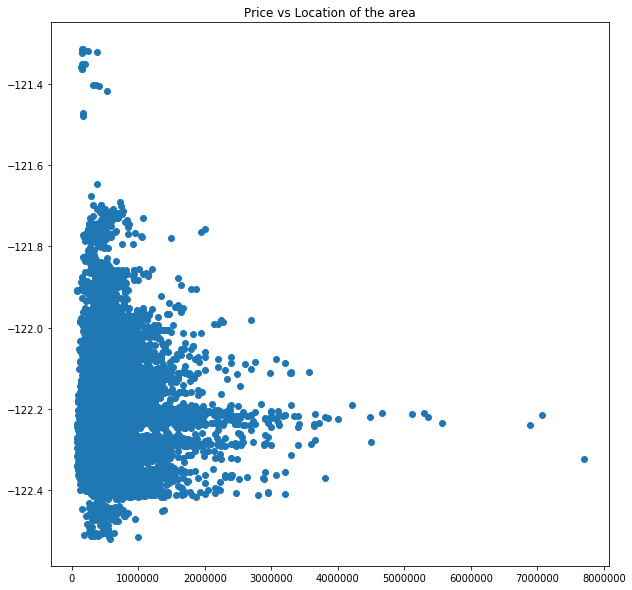

In [74]:
plt.figure(figsize=(10,10))
plt.scatter(data.price, data.long)
plt.title("Price vs Location of the area")

Text(0.5,1,'Bedroom adn Price')

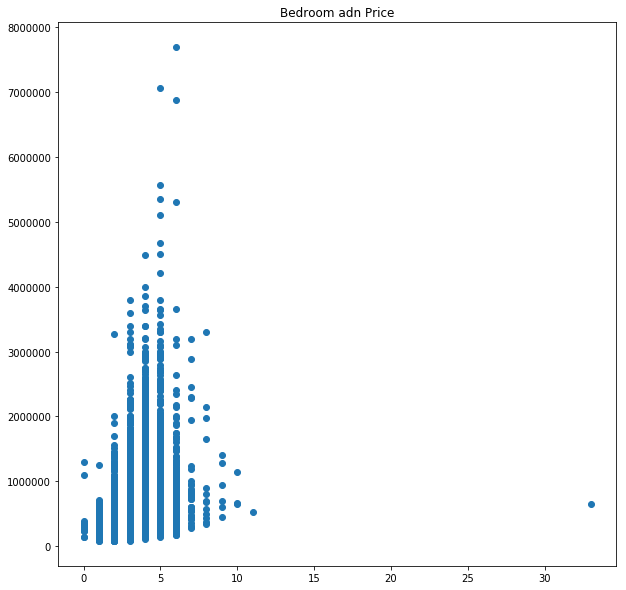

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(data.bedrooms, data.price)
plt.title("Bedroom adn Price")

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
reg = LinearRegression()

In [108]:
labels = data['price']
conv_dates = [1 if values[:4] == '2014' else 0 for values in data.date]
# mark the house in 2014 as 1 after 2014 as 0
data['date'] = conv_dates
train1 = data.drop(['id','price'], axis = 1)

In [110]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [111]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.1, random_state = 2)

In [114]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
reg.score(x_test, y_test)

0.73356462313035076

- To improve it, we need gradient boosting regression

    - produce a prediction model in the form of an ensemble of weak prediction models (e.g. decision tree)

In [116]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, 
                                         min_samples_split= 2, learning_rate=0.1, loss = 'ls')


In [117]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [118]:
clf.score(x_test, y_test)

0.92201104640097775

- n_estimator: number of boosting stages to perform. Too high -> overfit

- max_depth: the depth of the tree node

- learning_rate: rate of learning the data

- loss: loss funtion to be optimized. 'ls' -> least square

- minimum sample split: number of sample to be split for learning the data

In [119]:
help(ensemble.GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble.gradient_boosting:

class GradientBoostingRegressor(BaseGradientBoosting, sklearn.base.RegressorMixin)
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
 |      loss function to be optimized. 'ls' refers to least squares
 |      regression. 'lad' (least absolute deviation) is a highly robust
 |      loss function solely based on order information of the input
 |      variables. 'huber' is a combination of the two. 'quantile'
 |      allows quantile regression (use `alpha` to specify the quantile).
 |  
 |  learning_rate

### Gradient Boosting Algorithm for ML

- Boosting, origin from learning theory and AdaBoost

- How gradient works including the loss function, weak learners and the additive model

- How to improve performance over the base algorithm with various regularization schemas.

#### Origin of boosting

Whether a weak learner can be modified to become better;

The idea built upon Probability Approximately Correct (PAC) learning, a framework for investigating the complexity of ml problems;

- PAC: to use the weak learning several times to get a succession of hypotheses, each one refocused on the examples that the previous ones found difficult and misclassified

#### AdaBoost the First Boosting Algorithm


Boosting refers to this general problem of producing a very accurate prediction rule by combining rough and moderately inaccurate rules-of-thumb;

AdaBoost works by weighting the observation, putting more weight on difficult to classify instances and less on those already handled well. New weak learners aer added sequentially that focus their training on the more difficult patterns.

- Means that samples are difficult to classify receive increasing larger weights until the algorithm identifies a model that correctly classifies these samples.

#### Generalization of AdaBoost as Gradient Boosting

The statistical framework cast boosting as a numerical optimization problem where the objective is to minimize the loss of the model by adding weak learners using a gradient descent like procedure.

- Stage-wise additive model, one new weak learner is added at a time and existing weak learners in the model are frozen and left unchanged.

- Need to select a loss function

#### How Gradient Boosting Works

- Gradient boosting involves three elements:

    - A loss function to be optimized
    
    - A weak learner to make predictions
    
    - An additive model to add weak learners to minimize the loss function

##### Loss fucntion -> depends on the type of problems being solved

- Differentiable (must)

- Benfinit of gradient boosting: a new boosting algorithm does not have to be derived for each loss function that may want to be used (it is a generic framework that any differentiable loss function can be used)

#### Weak Learner

Gradient boosting -> use decision tree

- Regression trees are used to allow subsequent models to add ouputs and correct the rediduals in the predictions

- Trees are constructed in greedy manner (Gini)

- To constrain weak learner, set the maximum number of layers, nodes, splits or leaf nodes

#### Additive Model

- Gradient descent procedure is used to minimize the loss when adding trees

- Achive this by parameterizing the tree, modify the parameters of the tree and move in the right direction (reduce the residual loss)

- A fixed number of trees are added or training stops once loss reaches an acceptable level or no longer improves on an external validation dataset

#### Improvements to Basic Gradient Boosting

To avoid overfit

##### Tree constraints

- Number of trees

- Depth of trees

- Number of nodes or number of leaves

- Number of observations per split

- Minimim improvement to loss

##### Weighted Updates

- Shrinkage (or learning rate)

##### Stochastic Gradient Boosting

- To reduce the correlation between the trees in sequence in gradient boosting models.

- Aggressive sub-sampling such as selecting only 50% of the data has shown to be beneficial

##### Penalized Gradient Boosting

- The additional regularization term helps to smooth the final learnt weights to avoid over-fitting. 

     - L1 (least absolute deviations)
     
     - L2 (least absolute deviations)
     
||L1|L2|
|:-|:-|:-|
|Robust|Y|N|
|Stable|N|Y|
|Num of Sol|Mul|Single|


## Reference

1. [Linear Regression from Scratch in Python](https://mubaris.com/2017-09-28/linear-regression-from-scratch)